In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Todos os parâmetros
TRAIN_PATH = './data/train.csv'
TEST_PATH = './data/test.csv'
GENDER_SUBM = './data/gender_submission.csv'

In [5]:
# Execucao
train = pd.read_csv(TRAIN_PATH)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Variavel idade contem valores ausentes, Cabin e Embarked tambem. Todos deverao sem tratados
# 891 passageiros para treinamento
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test = pd.read_csv(TEST_PATH)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Teste nao contem a variavel survived pois sera o que vamos prever.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [10]:
# Este sera o arquivo a ser submetido. Temos acima o conjunto de testes com varios IDS,
# e para submissao no Kaggle devemos colocar o id de cada um e se o mesmo sobreviveu ou nao.
submission = pd.read_csv(GENDER_SUBM)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [11]:
# Primeiramente vamos tratar os dados de entrada
# Algumas variaveis parecem muito "sujas" para serem alimentadas já de inicio
# Fica como exercicio descobrir se faz sentido alimentar PassengerId e Name ou nao

NUM_COLS = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
CAT_COLS = ['Sex', 'Cabin', 'Embarked', 'Ticket']
TARGET_COL = 'Survived'
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


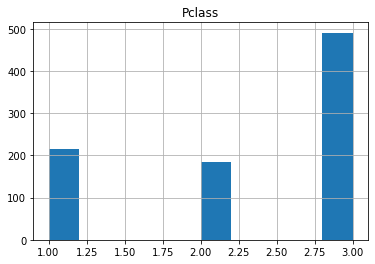

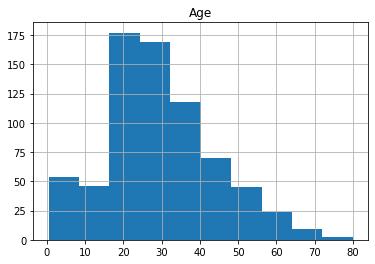

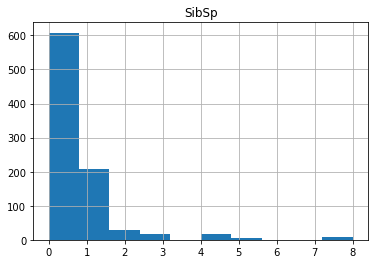

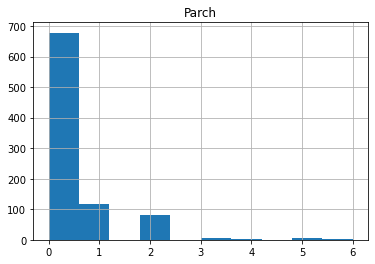

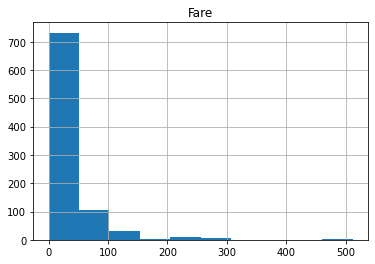

In [12]:
# Investigando a distribuicao das variaveis numericas
for col in NUM_COLS:
    train[col].hist()
    plt.title(col)
    plt.show()

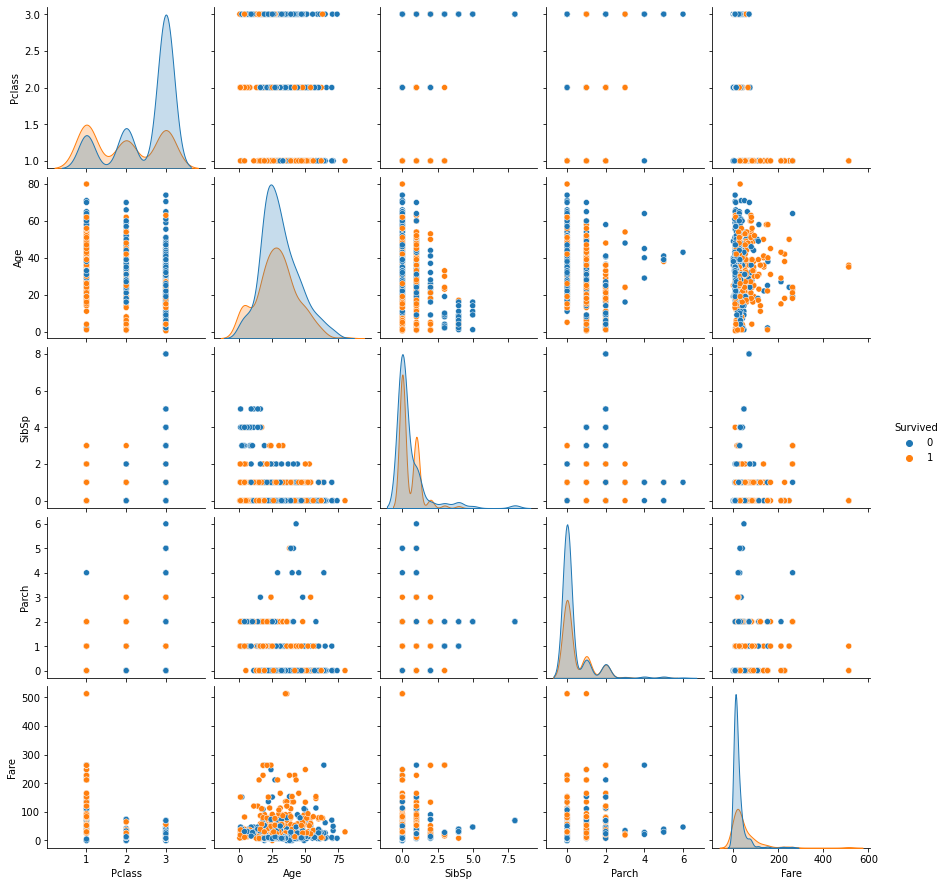

In [13]:
sns.pairplot(train[NUM_COLS + [TARGET_COL]], hue=TARGET_COL)

<AxesSubplot:>

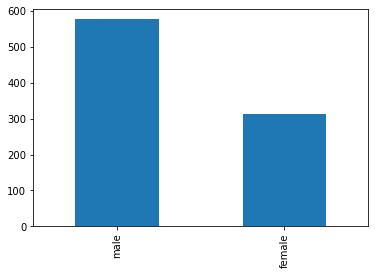

In [14]:
# Investigando a distribuicao das variaveis categoricas
# Exemplo
col = CAT_COLS[0]
train[col].value_counts().plot.bar()

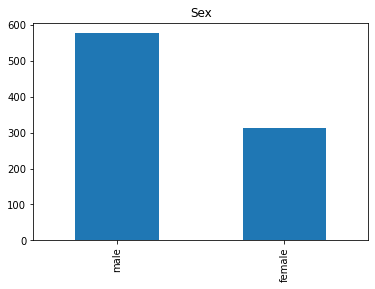

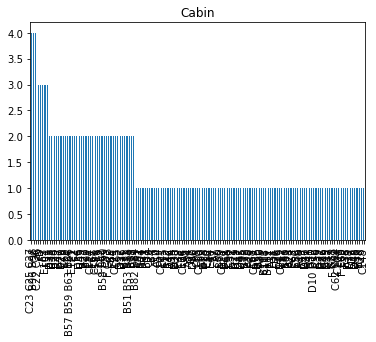

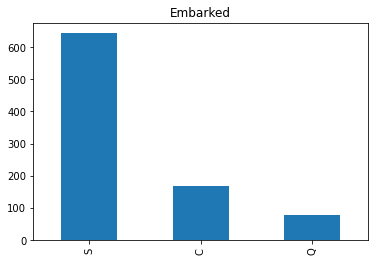

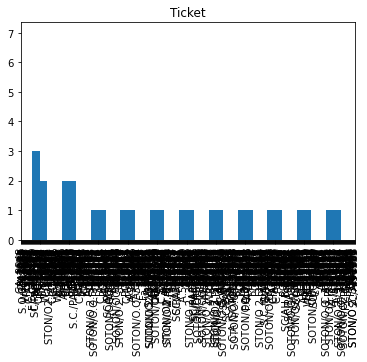

In [15]:
for col in CAT_COLS:
    train[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

In [16]:
# Cabin contém muitos valores distintos, não introduz informações que poderiam ser correlacionadas com o resto dos dados
# Atributos para considerarmos para engenharia de atributos: Name, Cabin, Ticket

CAT_COLS.remove('Ticket')

In [17]:
# Deixando explicito que removi posteriormente apos conferir os graficos de distribuicao
CAT_COLS.remove('Cabin')

In [18]:
# Tratamento de valores numericos ausentes
# Um bom ponto de partida é imputar com a mediana
train[NUM_COLS].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [19]:
# Aqui, ambos treino e teste sao atualizados com dados do conjunto de treino, pois em um ambiente real, 
# não temos acesso aos dados de teste (simulando dados de producao)

train_med = train[NUM_COLS].median()
train[NUM_COLS]=train[NUM_COLS].fillna(train_med)
test[NUM_COLS]=test[NUM_COLS].fillna(train_med)

In [20]:
train[NUM_COLS].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [21]:
# Uma sugestao para inputar valores ausentes em dados categoricos é usar get_dummies
# O mesmo substituira por 0 em todas as colunas de um valor ausente
# Outra alternativa seria preencher com o valor mais frequente
train[CAT_COLS].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Embarked  889 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


In [22]:
train_cat_dummy = pd.get_dummies(train[CAT_COLS])
train_cat_dummy

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [23]:
# Por exemplo, se sexo estivesse ausente, ficaria 0 0
test_cat_dummy = pd.get_dummies(test[CAT_COLS])
test_cat_dummy

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,1,0
1,1,0,0,0,1
2,0,1,0,1,0
3,0,1,0,0,1
4,1,0,0,0,1
...,...,...,...,...,...
413,0,1,0,0,1
414,1,0,1,0,0
415,0,1,0,0,1
416,0,1,0,0,1


In [24]:
from sklearn.model_selection import train_test_split

# Agora todos os dados de entrada sao numericos
X = pd.concat([train[NUM_COLS], train_cat_dummy], axis=1)
y = train[TARGET_COL]

In [25]:
# posteriormente podemos usar validacao cruzada, por simplicidade aqui vamos usar
# train_test_split para criar o conjunto de validacao
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
X_test = pd.concat([test[NUM_COLS], test_cat_dummy], axis=1)
display(X_test.head())

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [27]:
# Vamos iniciar a triagem com regressao logistica
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
lr.score(X_train, y_train) # Score padrao em classificadores eh a acuracia

0.7994011976047904

In [29]:
lr.score(X_val, y_val)

0.8026905829596412

In [30]:
# Conjunto de validacao melhor que de treino eh um sinal de overfitting, vamos testar RandomForest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9805389221556886

In [31]:
rf.score(X_val, y_val)

0.7892376681614349